__1) Find the probability density for the position X given the probability density of the angle of emittance. __

The lighthouse emits flashes distribution uniformly with respect to the angle $
\theta \in \left[-\frac{\pi}{2}, \frac{\pi}{2}\right] $.

The geometry of the problem is such that the position at which the pulses is intercepted at the coast is $x = \alpha + \beta \tan(\theta)$. We find the law according to which $x$ is distributed by using the trasformation law:
$$
P_X(x)dx = P_\Theta(\theta)d\theta \implies P_X(x) = P_\Theta(\theta) \frac{d\theta}{dx}
$$

We find:
$$
\frac{d\theta}{dx} = \frac{1}{\beta} \frac{1}{1+\left(\frac{x-\alpha}{\beta}
\right)^2}
$$

On the other hand $P_\Theta(\theta)$ is uniform and therefore $P_\Theta(\theta) = \frac{1}{\pi}$.

Putting it all together than we find:
$$
P_X(x) = P_\Theta(\theta) \frac{d\theta}{dx} =   \frac{1}{\pi \beta} \frac{1}{1+\left(\frac{x-\alpha}{\beta}
\right)^2}
$$

which is the Cauchy distribution.

__2) Sample points from the cauchy distribution.__

We sample data from the cauchy distribution. The plots below sample $20$ and $10^6$. In the latter case, one can clearly see the enormous spikes generated from the Cauchy distribution: one single point can be many order of magnitutes greater than the other point, to the extent that such point 'dominate' the plot. Gaussian distribution don't exhibit such phenomenon.

In [15]:
def prob_cauchy(alpha, beta, x):
    pi = 3.14159265359
    return (1/(pi*beta))*(1/(1+((x-alpha)/beta)**2))

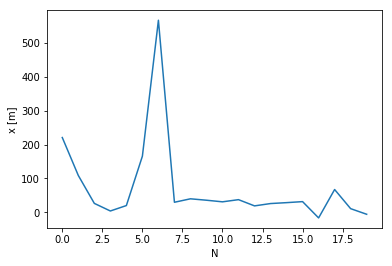

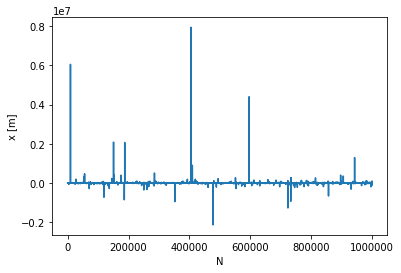

In [38]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 30.0
beta = 10.0

plt.plot(range(20), beta*np.random.standard_cauchy(20)+alpha)
plt.xlabel('N')
plt.ylabel('x [m]')
plt.show() 

plt.plot(range(1000000), beta*np.random.standard_cauchy(1000000)+alpha)
plt.xlabel('N')
plt.ylabel('x [m]')
plt.show() 

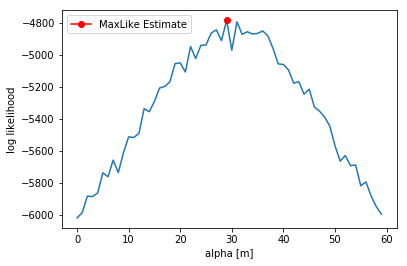

In [46]:
from math import log

import numpy as np
import matplotlib.pyplot as plt

alpha = 30.0
beta = 10.0
num_of_trials = 1000 #change this variabe to see the plot for different N

log_like = [] #to plot against alpha

for alpha_tmp in range(60):   
    log_like_tmp = 0;
    s = beta*np.random.standard_cauchy(num_of_trials)+alpha
    for i in range(num_of_trials):   
        log_like_tmp+=log(prob_cauchy(alpha_tmp, beta, s[i]))
    log_like.append(log_like_tmp)
        
plt.plot(range(60), log_like)
plt.plot([log_like.index(max(log_like))], [max(log_like)], label='MaxLike Estimate', marker='o', markersize=6, color="red")
plt.legend(loc='upper left')
plt.xlabel('alpha [m]')
plt.ylabel('log likelihood')
plt.show() 

__4) When sampling the Cauchy distribution, does the mean coincides
with the mode (i.e. the maximum) of the posterior ? Why is that ? Will they coincide
in the N → ∞ limit ?


__FURTHER ANALYSIS__

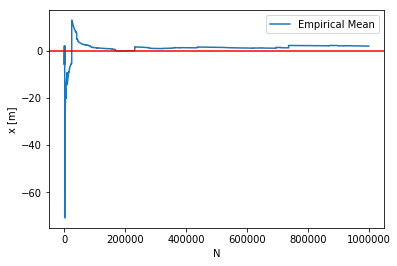

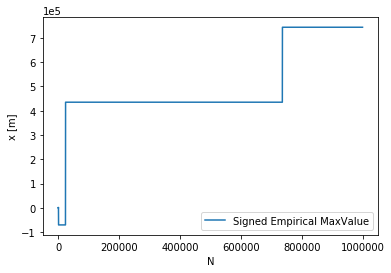

In [36]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.0
beta = 1.0
num_of_trials = 1000000

x_max = []
x_avg = []
x_max_tmp = -1
x_avg_tmp = 0

for i in range(num_of_trials):
    s = beta*np.random.standard_cauchy(1)+alpha
    x_avg_tmp += s[0]
    if abs(s[0]) > abs(x_max_tmp):
        x_max_tmp = s[0]
    x_max.append(x_max_tmp)    
    x_avg.append(x_avg_tmp/(i+1))

plt.plot(range(num_of_trials), x_avg, label='Empirical Mean')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('N')
plt.ylabel('x [m]')
plt.show() 


plt.plot(range(num_of_trials), x_max, label='Signed Empirical MaxValue')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc='lower right')
plt.xlabel('N')
plt.ylabel('x [m]')
plt.show() 